# Bisektionsverfahren
Das Bisektionsverfahren ist ein einfaches Verfahren das wir kennengelernt haben um Nullstellen zu finden. Es wird eine Folge von Werten berechnet, die gegen die Nullstelle konvergiert. Wir brauchen dazu zwei Startwerte $a$ und $b$ zwischen denen die Nullstelle liegt. Wir berechnen dann den Mittelwert $m$ und schauen ob die Nullstelle zwischen $a$ und $m$ oder zwischen $m$ und $b$ liegt. Wir ersetzen dann den Wert $a$ oder $b$ durch $m$ und wiederholen das Verfahren bis wir abbrechen wollen oder eine gewünschte Genauigkeit erreicht haben. 


Wir haben die folgende Funktion gegeben und wollen die Nullstelle finden:

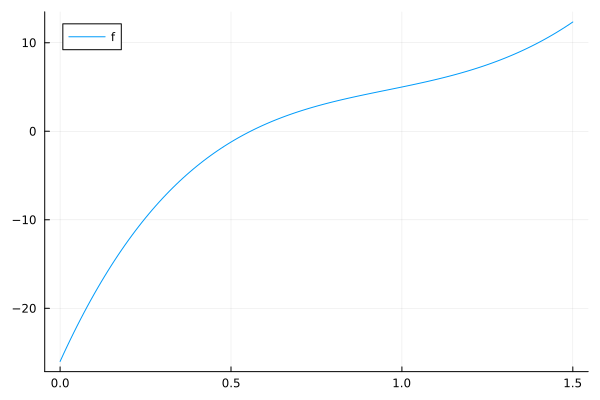

In [1]:
using Plots
f(x)= -26 + 85 * x - 91 * x^2 +44 * x^3 -8 * x^4 + x^5
plot(f, [0.0:0.01:1.5], label="f")

Um herauszufinden zwischen welchen Werten die Nullstelle liegt können wir das Vorzeichen auswerten. Bei unterschiedlichen Vorzeichen wissen wir, dass eine Nullstelle dazwischen liegen muss. Dafür definieren wir eine Funktion, die uns zurückgibt ob zwei functionen das gleiche Vorzeichen haben. 

In [2]:
# Funktion die testet ob a und b das gleiche Vorzeichen haben
function samesign(a, b)
    return a * b > 0
end

samesign (generic function with 1 method)

Jetzt noch das Verfahren selbst. Wir geben der Methode unsere Funktion und das Intervall in dem wir die Nullstelle vermuten an. Dann wird das Intervall halbiert und geschaut in welchem Intervall die Nullstelle liegt. Dieses Intervall wird dann wieder halbiert und so weiter. 

In [3]:
function bisect(func, low, high)
    #Find root of continuous function where f(low) and f(high) have opposite signs

    if samesign(func(low), func(high))
        return "Error: No root found"
    end
    midpoint = (low + high) / 2.0
    for n in 1:20 # Wir nehmen einfach mal ein paar Iterationen 
        midpoint = (low + high) / 2.0
        println("Iteration: ", n, " Midpoint: ", midpoint)
        if samesign(func(low), func(midpoint))
            low = midpoint
        else
            high = midpoint
        end
    end
    return midpoint
end

bisect (generic function with 1 method)

In [4]:
x = bisect(f, 0, 1)
println("x = ", x)

Iteration: 1 Midpoint: 0.5
Iteration: 2 Midpoint: 0.75
Iteration: 3 Midpoint: 0.625
Iteration: 4 Midpoint: 0.5625
Iteration: 5 Midpoint: 0.53125
Iteration: 6 Midpoint: 0.546875
Iteration: 7 Midpoint: 0.5546875
Iteration: 8 Midpoint: 0.55859375
Iteration: 9 Midpoint: 0.556640625
Iteration: 10 Midpoint: 0.5576171875
Iteration: 11 Midpoint: 0.55712890625
Iteration: 12 Midpoint: 0.556884765625
Iteration: 13 Midpoint: 0.5570068359375
Iteration: 14 Midpoint: 0.55706787109375
Iteration: 15 Midpoint: 0.557037353515625
Iteration: 16 Midpoint: 0.5570220947265625
Iteration: 17 Midpoint: 0.5570297241210938
Iteration: 18 Midpoint: 0.5570259094238281
Iteration: 19 Midpoint: 0.5570240020751953
Iteration: 20 Midpoint: 0.5570249557495117
x = 0.5570249557495117


Können wir die Funktion so erweitern, dass wir abbrechen sobald wir eine gewisse Genauigkeit zu Null erreicht haben? Sagen wir 0.0001? Wir müssen also die Abbruchbedingung noch mit einbauen indem wir die Funtkion an der Stelle x ausrechnen.

In [5]:
function bisect(func, low, high, tolerance)
    # Find root of continuous function where f(low) and f(high) have opposite signs

    if samesign(func(low), func(high))
        return "Error: No root found"
    end
    midpoint = (low + high) / 2.0
    for n in 1:1000 # Wir nehmen einfach mal ein paar Iterationen 
        midpoint = (low + high) / 2.0
        println("Iteration: ", n, " Midpoint: ", midpoint)
        if samesign(func(low), func(midpoint))
            low = midpoint
        else
            high = midpoint
        end
        if abs(high - low) < tolerance
            break
        end
    end
    return midpoint
end

bisect (generic function with 2 methods)

In [6]:
x = bisect(f, 0, 1, 0.0001)
println("x = ", x)

Iteration: 1 Midpoint: 0.5
Iteration: 2 Midpoint: 0.75
Iteration: 3 Midpoint: 0.625
Iteration: 4 Midpoint: 0.5625
Iteration: 5 Midpoint: 0.53125
Iteration: 6 Midpoint: 0.546875
Iteration: 7 Midpoint: 0.5546875
Iteration: 8 Midpoint: 0.55859375
Iteration: 9 Midpoint: 0.556640625
Iteration: 10 Midpoint: 0.5576171875
Iteration: 11 Midpoint: 0.55712890625
Iteration: 12 Midpoint: 0.556884765625
Iteration: 13 Midpoint: 0.5570068359375
Iteration: 14 Midpoint: 0.55706787109375
x = 0.55706787109375


# Newton-Verfahren
Jetzt wollen wir das Newton-Verfahren implementieren. Dafür nutzen wir die erste Taylor approximation (Tangente) an der Stelle $x_n$:
$$f(x) = f(x_n) + f'(x_n)(x-x_n)$$
Wir wollen ja die Nullstelle finden, also setzen wir $f(x_{n+1}) = 0$ und lösen nach $x$ auf:
$$0 = f(x_n) + f'(x_n)(x_{n+1}-x_n)$$
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$  
Die Rechenregel für das nächste x welches näher an der Nullstelle liegt wird demnach iterativ immer wieder aufgerufen. Die Rechenregel nach dem Newton Verfahren ist demnach:
$$x_0 = startwert$$
$$x_{1} = x_0 - \frac{f(x_0)}{f'(x_0)}$$
$$x_{2} = x_{1} - \frac{f(x_{1})}{f'(x_{1})}$$
...
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$ 
Das machen wir so lange bis wir die gewünschte Genauigkeit, also der gewünschte Abstand von $f(x_{n+1})$ zu 0, erreicht haben. 

Wir brauchen also die erste Ableitung unserer Funktion. Das machen wir hier erst mal von hand:

In [7]:
f(x) = -26 + 85 * x - 91 * x^2 + 44 * x^3 - 8 * x^4 + x^5
df(x) = 85 - 182 * x + 132 * x^2 - 32 * x^3 + 5 * x^4

df (generic function with 1 method)

Als nächstes brauchen wir eine Funktion die uns den Abstand von $f(x_0)$ zu 0 berechnet. Damit wir wissen wann wir aufhören müssen.

In [8]:
function dx(f, x)
    return abs(0 - f(x))
end

dx (generic function with 1 method)

Jetzt die Newton Methode selbst. Wir geben wieder die Funktion, die Ableitung und einen Startwert an. Dann berechnen wir den nächsten Wert mithilfe der Newton Methode. Das machen wir solange bis wir die gewünschte Genauigkeit erreicht haben.

In [9]:
function newton(func, dfunc, x0, tolerance)
    delta = dx(func, x0)
    n = 0
    while delta > tolerance
        n += 1
        x0 = x0 - func(x0) / dfunc(x0)
        delta = dx(func, x0)
        println("Iteration: ", n, " x0: ", x0)
        if n > 100
            break
        end
    end
    return x0
end

newton (generic function with 1 method)

Testen wir unsere Funktion mal mit dem Startwert 1.0.

In [10]:
x = newton(f, df, 1.0, 0.0001)
println("x = ", x)

Iteration: 1 x0: 0.375
Iteration: 2 x0: 0.5159194399600385
Iteration: 3 x0: 0.5545080566547139
Iteration: 4 x0: 0.557015604236721
Iteration: 5 x0: 0.5570255161323902
x = 0.5570255161323902


Jetzt mal mit dem Startwert 0.0.

In [11]:
x = newton(f, df, 0.0, 0.0001)
println("x = ", x)

Iteration: 1 x0: 0.3058823529411765
Iteration: 2 x0: 0.4853190940239955
Iteration: 3 x0: 0.5496617287634946
Iteration: 4 x0: 0.5569412135377882
Iteration: 5 x0: 0.5570255051379259
x = 0.5570255051379259


Was passiert denn bei 5.0? 

In [12]:
x = newton(f, df, 5.0, 0.0001)
println("x = ", x)

Iteration: 1 x0: 3.9068750000000003
Iteration: 2 x0: 2.9968194172519835
Iteration: 3 x0: 2.2774066125543753
Iteration: 4 x0: 1.72766052390229
Iteration: 5 x0: 1.2684010520439337
Iteration: 6 x0: 0.7193102766389161
Iteration: 7 x0: 0.5090228763893254
Iteration: 8 x0: 0.5536227154224381
Iteration: 9 x0: 0.5570074263119684
Iteration: 10 x0: 0.5570255157731352
x = 0.5570255157731352


## Newton-Verfahren mit beliebigen Funktionen
Wir haben ja schon das Taylorverfahren und das Package in Julia mit dem wir die Ableitung automatisch berechnen können kennengelernt. Testen wir das doch mal für unsere Newton methode. 

In [14]:
using TaylorSeries # ansonsten fügen wir es einfach hinzu

Wir können mit dem Package die Ableitung berechnen. Hier noch mal ein Beispielaufruf. 
````julia
using TaylorSeries
func = x -> sin(x)
x = 1.0
TS = Taylor1(Float64, 1)
dfunc = func(TS)
ts = myFunc.(x)
````
Hier wird dann das Taylorpolynom an der Stelle $x_0=0$ berechnet. Wir können das Polynom auch an einer anderen Stelle auswerten. Hierfür können wir taylor_expand nutzen. 

````julia
func_t = taylor_expand(func, a, order=1)
````

Mithilfe von differentiate können wir die Ableitung berechnen. 

````julia
dfunc_t = differentiate(func_t)
````

Als erstes erstellt eine Funktion welche die Taylorreihe für eine Funktion erstellt. Die Funktion soll die Funktion übergeben 
bekommen und die Taylorreihe zurückgeben.

In [15]:
function get_taylor(func, a)
    func_t = taylor_expand(f, a, order=1) # Taylor series of f around a
    return func_t
end
t_f = get_taylor(f, 0.5) # Taylor series of f around 0

 - 1.21875 + 23.3125 t + 𝒪(t²)

Wir bauen uns jetzt eine newton methode die die Ableitung automatisch berechnet. Wir geben deshalb die Funktion, den Startwert und die Genauigkeit an. Dieses mal also ohne die Ableitung zu übergeben. 

In [16]:
function newton_taylor(func, x0, tolerance)
    func_t = get_taylor(func, x0)
    delta = dx(func, x0)
    n = 0
    while delta > tolerance
        n += 1
        df_t = differentiate(func_t)
        x0 = x0 - func(x0) / df_t()
        delta = dx(func, x0)
        func_t = get_taylor(func, x0)
        println("Iteration: ", n, " x0: ", x0)
        if n > 100
            break
        end
    end
    return x0
end

newton_taylor (generic function with 1 method)

In [17]:
x = newton_taylor(f, 1.0, 0.0001)
println("x = ", x)

Iteration: 1 x0: 0.375
Iteration: 2 x0: 0.5159194399600385
Iteration: 3 x0: 0.5545080566547139
Iteration: 4 x0: 0.557015604236721
Iteration: 5 x0: 0.5570255161323902
x = 0.5570255161323902
